## Ex1

In [1]:
# fit the sigmoid curve and calculate decision boundary using given dataset

# a cheat sheet:
# in an optimization loop
# first calculate hypothesis for each datapoint x in X: h = 1 / (1 + exp(-theta0-theta1*x))
# then calculate crossentropy: -y*log(h) - (1-y)*log(1-h)
# and cost: sum(crossentropy) / len(x)
# next calculate derivatives for theta 0 and theta1 (similar to those in linear regression)
# theta0_deriv = sum(h - y) / len(y), theta1_deriv = sum((h-y)*X)
# and then update theta weights
# theta = theta - lr*theta_deriv

# check if cost is getting lower through iterations
# if not, try to modify the learning rate

# calculating decision boundary might look like this:
# theta[0] + theta[1]*x = 0
# theta[1]*x = -theta[0]
# x = -theta[0]/theta[1]

# the result might look like below

from matplotlib import pyplot as plt
import numpy as np

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 15, 25], dtype=np.float32)
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1,  1,  1], dtype=np.float32)

theta = np.array([0, 0], dtype=np.float32)

# optimization loop

In [2]:
max_iter = 10000
eps = 0.00001
alpha = 0.05
prev_cost = 99


for i in range(max_iter):
    h_x = 1/(1 + np.exp(-theta[0] - theta[1]*X))

    crossentropy = -y*np.log(h_x+0.00001) - (1-y)*np.log(1-h_x+0.00001)
    cost = np.sum(crossentropy) / X.shape[0]

    theta_deriv = np.array([sum(h_x-y)/len(y), sum((h_x-y)*X)], dtype=np.float32)
    theta = theta - alpha*theta_deriv

    if np.abs(prev_cost - cost) < eps:
        break

    prev_cost = cost

In [3]:
theta

array([-6.1057777,  0.9486568], dtype=float32)

In [4]:
border = -theta[0]/theta[1]
border

6.4362345

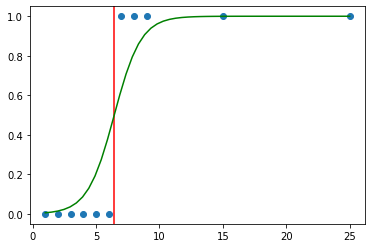

In [5]:
x_sim = np.linspace(1, 25)
y_sim = 1.0 / (1 + np.exp(-theta[0] - theta[1]*x_sim))
plt.scatter(X, y)
plt.axvline(border, c='r')
plt.plot(x_sim, y_sim, c='g')
plt.show()

## Ex2

In [6]:
# generalize optimization code for X being a matrix, where its rows are features and columns are examples
# code should work independently from number of features and number of examples
# use matrix multiplication (np.matmul or @)
# plot decision boundary on a plot x2(x1)
# calculating decision boundary might look like this:
# theta0 + theta1*x1 + theta2*x2 = 0
# theta2*x2 = -theta0 - theta1*x1
# x2 = -theta0/theta2 - theta1/theta2 * x1


from matplotlib import pyplot as plt
import numpy as np

X = np.array([[ 1, 1, 1, 1, 1, 1, 1, 1, 1,  1,  1], # bias' 'variables' already appended to X
              [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 15, 25],
              [13, 9, 8, 6, 4, 2, 1, 0, 3,  4,  2]], dtype=np.float32)
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1,  1,  1], dtype=np.float32)

theta = np.zeros((X.shape[0], 1))

In [7]:
def optimalize_theta_multidim(X, y, theta, iterations=10000, learning_rate=0.5, eps=0.00001):
    h = np.zeros(X.shape[1], dtype = np.float32)
    crossentropy = np.zeros(X.shape[1], dtype = np.float32)
    theta_deriv = np.zeros(theta.shape, dtype = np.float32)
    theta_res = theta
    cost = np.zeros(iterations)
    prev_cost = 99
    for it in range(iterations):
        h = 1 / (1 + np.exp(-theta_res.T @ X))
        crossentropy = -y * np.log(h + eps) - (1-y) * np.log(1 - h + eps)
        cost[it] = np.sum(crossentropy) / X.shape[1]
           
        for i in range(X.shape[0]):
            theta_deriv[i] = np.sum((h-y) @ X[i,:].T) / X.shape[1]
        theta_res = theta_res - learning_rate * theta_deriv
        if np.abs(prev_cost - cost[it]) < eps:
            break
        prev_cost = cost[it]
    return theta_res

In [8]:
theta_result = optimalize_theta_multidim(X, y, theta)
theta_result

array([[-9.67397691],
       [ 2.61064441],
       [-3.8567877 ]])

In [9]:
x1 = np.linspace(np.min(X[1, :]), np.max(X[1, :]), 100)
x2 = -theta_result[0, 0]/theta_result[2, 0] - theta_result[1, 0]/theta_result[2, 0] * x1

In [10]:
X_positive = X[:, y[:] == 1]
X_negative = X[:, y[:] == 0]

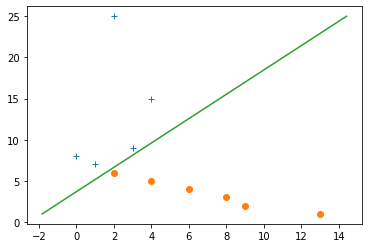

In [11]:
plt.plot(X_positive[2, :], X_positive[1, :], '+')
plt.plot(X_negative[2, :], X_negative[1, :], 'o')
plt.plot(x2, x1, '-')

## Ex3

In [12]:
# using real data, optimize classifier to predict given values

# split dataset into a training set and a test set
# train model on the training set
# calculate TP, FP, TN, FN on test set
# calculate sensitivity, specificity, positive predictivity and negative predictivity


from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('./data.txt')

In [13]:
# insert one on beggining of dataset 
data.insert(loc=0, column='', value=1)
data = data.values

In [14]:
# normalize data
data[:, 1] = (data[:, 1] - np.std(data[:, 1])) / np.mean(data[:, 1])
data[:, 2] = (data[:, 2] - np.std(data[:, 2])) / np.mean(data[:, 2])

In [15]:
# split for labels and features
X = data[:, [0, 1, 2]]
y = data[:, 3]

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [17]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

In [18]:
# Transform all data
X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

In [19]:
# Optimalize theta
theta = np.zeros(X_train.shape[0], dtype=np.float32)
theta_res = optimalize_theta_multidim(X_train, y_train, theta, learning_rate=0.1)

In [20]:
theta_res

array([-8.299828 ,  6.304302 ,  6.5650043], dtype=float32)

In [21]:
def calculate_positeve_negative(y_test, y_pred):
    TP = np.sum(np.logical_and(y_test == 1, y_pred == 1))
    TN = np.sum(np.logical_and(y_test == 0, y_pred == 0))
    FP = np.sum(np.logical_and(y_test == 0, y_pred == 1))
    FN = np.sum(np.logical_and(y_test == 1, y_pred == 0))
    
    return (TP, TN, FP, FN)

In [22]:
y_pred = 1 / np.exp(-theta_res.T @ X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.squeeze(y_pred)

In [23]:
TP, TN, FP, FN = calculate_positeve_negative(y_test, y_pred)
print(f'TN: {TN}, TP: {TP}, FP: {FP}, FN: {FN}')

TN: 11, TP: 26, FP: 3, FN: 0


In [24]:
# specifity
TN / (TN + FP)

0.7857142857142857

In [25]:
# sensifity
recall_score(y_test, y_pred)

1.0

In [26]:
# possitive predictivity
precision_score(y_test, y_pred)

0.896551724137931

In [27]:
# negatice predictivity

In [28]:
x1 = np.linspace(np.min(X[: ,1]), np.max(X[:, 1]), 100)
x2 = -(theta_res[0] + theta_res[1] * x1) / theta_res[2]

In [29]:
X_positive = X[y[:] == 1]
X_negative = X[y[:] == 0]

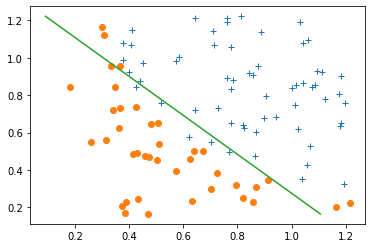

In [30]:
plt.plot(X_positive[:, 2], X_positive[:, 1], '+')
plt.plot(X_negative[:, 2], X_negative[:, 1], 'o')
plt.plot(x2, x1, '-')

 ## Ex4

In [31]:
# using mnist dataset, optimize classifier to distinguish hand written digits
# all vs one classification - train ten classifiers,
# each of which will classify specific value against the rest

# download train and test data from
# http://yann.lecun.com/exdb/mnist/index.html and extract each archive
# if previous exercise have been done correctly,
# training should boil down only to appropriate data conversion
# (set data to X and y)

from matplotlib import pyplot as plt
import numpy as np


def read_data_set(images_path, labels_path, num_images):
    image_size = 28
    # training set
    with open(images_path, 'rb') as f:
        f.read(16)
        buf = f.read(image_size * image_size * num_images)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        training_data = data.reshape(num_images, image_size, image_size)
    # labels
    with open(labels_path, 'rb') as f:
        f.read(8)
        buf = f.read(num_images)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        training_labels = data.reshape(num_images)
    return training_data, training_labels

0.0


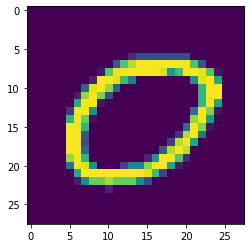

In [32]:
# how to read mnist https://stackoverflow.com/questions/40427435/extract-images-from-idx3-ubyte-file-or-gzip-via-python
training_data, training_labels = read_data_set('./train-images-idx3-ubyte', './train-labels-idx1-ubyte', 60000)
training_data = training_data/255.0 # can be normalized to converge faster

# check if data have been loaded correctly
example_idx = 156
print(training_labels[example_idx])
plt.imshow(training_data[example_idx])

In [33]:
# training data must be vectorized
# from [n_examples, height, width] to [n_examples, n_features]
training_data.shape = [training_data.shape[0], training_data.shape[1] * training_data.shape[2]]

# lets start with '2' vs rest
y = np.array(training_labels == 2, dtype=np.float32)
X = np.concatenate((np.ones((1, len(y))), training_data.T))

theta = np.zeros((X.shape[0], 1))

In [34]:
theta_res = optimalize_theta_multidim(X, y, theta, learning_rate=0.1, iterations=10)

In [35]:
# now we need to read test set and reshape it similarly to training set
test_data, test_labels = read_data_set('./t10k-images-idx3-ubyte', './t10k-labels-idx1-ubyte', 10000)
test_data = test_data / 255.0
test_data.shape = [test_data.shape[0], test_data.shape[1] * test_data.shape[2]]
y = np.array(test_labels == 2, dtype=np.float32)
X = np.concatenate((np.ones((1, len(y))), test_data.T))

In [36]:
# calculate hypothesis for test data
h = 1.0 / (1 + np.exp(-theta.T @ X))
y_pred = np.round(h.flatten()) # and classify it

In [37]:
TP, TN, FP, FN = calculate_positeve_negative(test_labels, y_pred)
print(f'TN: {TN}, TP: {TP}, FP: {FP}, FN: {FN}')

TN: 980, TP: 0, FP: 0, FN: 1135


In [38]:
# and the sensitivity and positive predictivity
se = TP / (TP+FN)
pp = TP / (TP+FP)

print('se: {}, pp: {}'.format(se, pp))

se: 0.0, pp: nan


/home/artur/Documents/agh/sem_II/ml/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
from sklearn.linear_model import SGDClassifier

In [40]:
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=10)

In [42]:
clf.fit(training_data, training_labels)

/home/artur/Documents/agh/sem_II/ml/venv/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(max_iter=10)

In [43]:
y_pred = clf.predict(test_data)

In [45]:
TP, TN, FP, FN = calculate_positeve_negative(test_labels, y_pred)
print(f'TN: {TN}, TP: {TP}, FP: {FP}, FN: {FN}')

TN: 961, TP: 1116, FP: 0, FN: 0


In [46]:
# and the sensitivity and positive predictivity
se = TP / (TP+FN)
pp = TP / (TP+FP)

print('se: {}, pp: {}'.format(se, pp))

se: 1.0, pp: 1.0
